In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_particles = 4
dims = 1 + 2

particles = (np.random.random(
    size=(num_particles, 2, dims) # (t, x, y, m, px, py)
) - 0.5) * 2

In [3]:




four_vecs = particles * 1
for i, p in enumerate(particles):
    mass = p[1][0]
    momentum = p[1][1:]

    E = np.sqrt(mass**2 + np.linalg.norm(momentum) ** 2)

    four_vecs[i][1][0] = E
# Now, four_vecs is (t, x, y, E, px, py)


In [4]:
# Remove average position -> Translation invariant
avg = np.average(four_vecs, axis=0)[0]
four_vecs[:, 0] -= avg

In [5]:
# Go to COM frame -> lorentz invariant

# Total 4- momentum of system
tot_mom = np.sum(four_vecs[:, 1], axis=0)

# Decomposed
tot_energy = tot_mom[0]
tot_spat_mom = tot_mom[1:]

# Total mass
tot_mass = np.sqrt(tot_energy**2 - np.linalg.norm(tot_spat_mom)**2)

# Rotate to y dir
theta = -np.arctan2(tot_spat_mom[1], tot_spat_mom[0])

c, s = np.cos(theta), np.sin(theta)
rot_matr = np.array([
    [c, -s],
    [s, c]
])
tot_spat_mom = rot_matr @ tot_spat_mom
mom_x = np.sum(tot_spat_mom)

# rapidity
rap = 0.5 * np.log(
    (tot_energy + mom_x) / (tot_energy - mom_x)
)

ch, sh = np.cosh(rap), np.sinh(rap)
boost_matr = np.array([
    [ch, sh],
    [sh, ch]
])

# Total lorentz
temp_id = np.identity(dims)
temp_id[1:,1:] = rot_matr
rot_matr = temp_id * 1

temp_id = np.identity(dims)
temp_id[:-1,:-1] = np.linalg.inv(boost_matr)
boost_matr = temp_id * 1

lorentz = boost_matr @ rot_matr

# This lorentz transformation is the one needed to boost the total momentum 4-vector to its COM frame
for i, p in enumerate(four_vecs):
    pos = p[0]
    momentum = p[1]

    four_vecs[i][1] = lorentz @ pos
    four_vecs[i][1] = lorentz @ momentum

# Total 4- momentum of system
tot_mom_test = np.sum(four_vecs[:, 1], axis=0)
print(tot_mom_test)


[-1.11022302e-16  0.00000000e+00  2.22044605e-16]


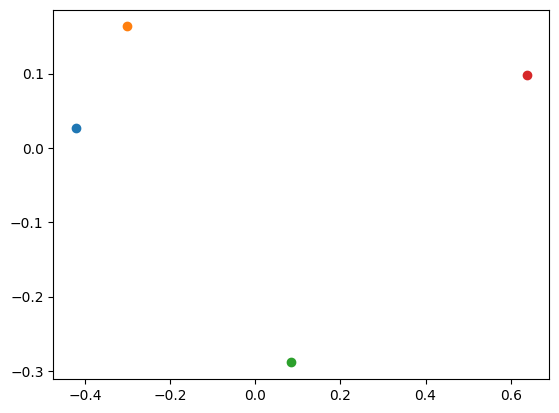

In [6]:
for p in four_vecs:
    pos = p[0]
    mom = p[1]
    plt.scatter(pos[1], pos[2])

# plt.scatter(avg[0][1], avg[0][2], c='b')

In [7]:
import numpy as np

In [8]:

def PermIneq(a, lambdas):
    totsum = np.sum(a)
    trace = np.einsum("ii", a)
    diag = np.einsum("ii->i", a)
    rowsum = np.einsum("ij->i", a) # i'th element is sum of i'th row
    colsum = np.einsum("ij->j", a) # i'th element is sum of i'th column

    # To diagonal (1, 4, 5, 6, 12)
    b = np.diag(
        lambdas[0] * diag +
        lambdas[1] * rowsum +
        lambdas[2] * colsum +
        lambdas[3] * trace +
        lambdas[4] * totsum
    )

    # To rows (2, 13, 14)
    b += (
        lambdas[5] * diag +
        lambdas[6] * rowsum +
        lambdas[7] * colsum
    )

    # To cols (3, 10, 11)
    b = np.transpose(b)
    b += (
        lambdas[8] * diag +
        lambdas[9] * rowsum +
        lambdas[10] * colsum
    )
    b = np.transpose(b)

    # To whole (7, 8, 9, 15)
    b += (
        lambdas[11] * np.transpose(a) +
        lambdas[12] * a +
        lambdas[13] * trace +
        lambdas[14] * totsum
    )
    return b


In [9]:
lambdas = np.random.normal(size=15)

In [10]:
a = np.arange(5)
outer = np.outer(a, a)
print(PermIneq(outer, lambdas))

a[0] = 1
a[1] = 0
outer = np.outer(a, a)
print(PermIneq(outer, lambdas))



[[ -88.42185248 -150.8674306  -153.02937439 -156.69213844 -161.85572275]
 [-144.15964036  -81.25637008 -149.06989075 -153.77624634 -159.9834222 ]
 [-137.64533581 -140.39364242  -73.2595024  -150.39271643 -157.64348383]
 [-130.66339344 -134.45529159 -139.74801     -64.43124944 -154.83590763]
 [-123.21381324 -128.04930294 -134.3856129  -142.22274312  -54.7716112 ]]
[[ -81.25637008 -144.15964036 -149.06989075 -153.77624634 -159.9834222 ]
 [-150.8674306   -88.42185248 -153.02937439 -156.69213844 -161.85572275]
 [-140.39364242 -137.64533581  -73.2595024  -150.39271643 -157.64348383]
 [-134.45529159 -130.66339344 -139.74801     -64.43124944 -154.83590763]
 [-128.04930294 -123.21381324 -134.3856129  -142.22274312  -54.7716112 ]]


In [11]:
a = np.array([1, 2, 3])

c = np.einsum("i, j -> ij", np.ones_like(a), a)
print(c)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [12]:
import tensorflow as tf
x = tf.constant([[1, 4], [1, 4]])
y = tf.constant([[2, 4], [1, 4]])
z = tf.constant([[3, 4], [1, 4]])
res = tf.stack([x, y, z], axis=2)
print(res)
print(res[0])



tf.Tensor(
[[[1 2 3]
  [4 4 4]]

 [[1 1 1]
  [4 4 4]]], shape=(2, 2, 3), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 4 4]], shape=(2, 3), dtype=int32)


In [60]:
a = tf.stack([
    [
        [1, 2],
        [3, 4]
    ],
    [
        [2, 4],
        [8, 9]
    ],
    [
        [5, 1],
        [1, 5]
    ]
], axis=-1)


b = tf.stack([a, a, a, a], axis=0)

N = 2

L = np.einsum("...iil->...l", b)
A = tf.eye(num_rows=N, batch_shape=L.shape)
B = np.einsum("...i, ...ijk->...ijk", L, A)

print(L)
print(L.shape)

print(A)
print(A.shape)

print(B)
print(B.shape)
# diag = tf.linalg.diag(L, num_rows=4, num_cols=4)
# print(diag)

# for i, elem in enumerate(diag):
#     print(i)
#     print(elem)

[[ 5 11 10]
 [ 5 11 10]
 [ 5 11 10]
 [ 5 11 10]]
(4, 3)
tf.Tensor(
[[[[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]]


 [[[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]]


 [[[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]]


 [[[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]

  [[1. 0.]
   [0. 1.]]]], shape=(4, 3, 2, 2), dtype=float32)
(4, 3, 2, 2)
[[[[ 5.  0.]
   [ 0.  5.]]

  [[11.  0.]
   [ 0. 11.]]

  [[10.  0.]
   [ 0. 10.]]]


 [[[ 5.  0.]
   [ 0.  5.]]

  [[11.  0.]
   [ 0. 11.]]

  [[10.  0.]
   [ 0. 10.]]]


 [[[ 5.  0.]
   [ 0.  5.]]

  [[11.  0.]
   [ 0. 11.]]

  [[10.  0.]
   [ 0. 10.]]]


 [[[ 5.  0.]
   [ 0.  5.]]

  [[11.  0.]
   [ 0. 11.]]

  [[10.  0.]
   [ 0. 10.]]]]
(4, 3, 2, 2)
